# Remote Job Proportions Analysis
This notebook answers the follow question, "does there exist an association between job role and job level?" This is achieved via hypothesis testing using the chi squared test of independence with a significance value of 0.05.

A stacked barchart is used to visualize the proportions.

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import itertools
import scipy.stats as stats

In [2]:
df = pd.read_csv('/dsa/groups/casestudy2023su/team05/results_v7.csv') 
df = df.reset_index(drop=True)
df.shape

(16349, 250)

In [3]:
'''
Because job listings can contain more than one job role (f.e. one job listing could be hiring for
a Data Scientist, Data Engineer, and Data Analyst), we want to only select the subset of job listings
that have one job role. This is important when doing statistics to measure job trends for certain
job roles.
'''

df1 = df[df.num_job_labels == 1]
df1 = df1.reset_index(drop=True)

# Create a new column called job_label and assign an empty string to every row for that column.
df1['job_label'] = ''

# For each row, check which of the job roles was found and assign that job role to the job_label column.
for index, row in df1.iterrows():
    if row['ds_label'] == True:
        df1.at[index, 'job_label'] = 'Data Scientist'
    if row['da_label'] == True:
        df1.at[index, 'job_label'] = 'Data Analyst'
    if row['de_label'] == True:
        df1.at[index, 'job_label'] = 'Data Engineer'
    if row['mle_label'] == True:
        df1.at[index, 'job_label'] = 'Machine Learning Engineer'
    if row['bia_label'] == True:
        df1.at[index, 'job_label'] = 'Business Intelligence Analyst'


In [18]:
job_role_frequencies = df1['job_label'].value_counts()

job_role_frequencies.index = ['Data Analyst', 'Data Scientist', 'BI Analyst', 'Data Engineer', 'ML Engineer']

job_role_frequencies

Data Analyst      6222
Data Scientist    4750
BI Analyst        3119
Data Engineer      997
ML Engineer        891
Name: job_label, dtype: int64

In [7]:
junior = df1[(df1.junior == 1.0) | (df1.entry_level == 1.0) | (df1.level_i == 1.0)]
senior = df1[(df1.senior == 1.0) | (df1.principal == 1.0) | (df1.level_iii == 1.0) | (df1.lead == 1.0)]


In [11]:
job_level_by_job_role = []

job_roles = df1.groupby('job_label')
for job_role in job_roles:
    temp = {}
    
    temp['junior'] = job_role[1][(job_role[1].junior == 1.0) | (job_role[1].entry_level == 1.0) | (job_role[1].level_i == 1.0)].shape[0]
    temp['senior'] = job_role[1][(job_role[1].senior == 1.0) | (job_role[1].principal == 1.0) | (job_role[1].level_iii == 1.0) | (job_role[1].lead == 1.0)].shape[0]
    temp['other'] = job_role[1].shape[0] - temp['junior'] - temp['senior']
    
    job_level_by_job_role.append(pd.Series(temp, name=job_role[0]))
    
    

In [60]:
for role in job_level_by_job_role:
    print(role)

junior     122
senior     762
other     2235
Name: Business Intelligence Analyst, dtype: int64
junior     255
senior    1473
other     4494
Name: Data Analyst, dtype: int64
junior     16
senior    411
other     570
Name: Data Engineer, dtype: int64
junior     178
senior    1649
other     2923
Name: Data Scientist, dtype: int64
junior     22
senior    341
other     528
Name: Machine Learning Engineer, dtype: int64


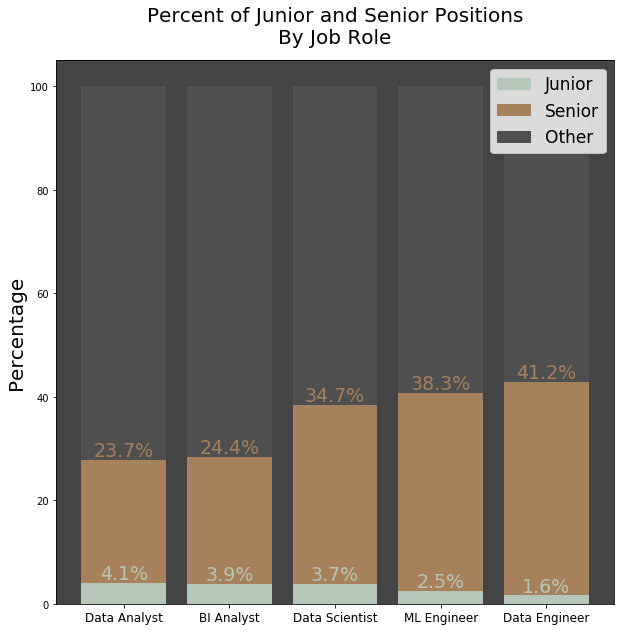

In [113]:
categories = ['Data Analyst', 'BI Analyst', 'Data Scientist', 'ML Engineer', 'Data Engineer']

junior = []
senior = []
other = []
for role in job_level_by_job_role:
    junior.append(role['junior'])
    senior.append(role['senior'])
    other.append(role['other'])


new_order = [1, 0, 3, 4, 2]

# Rearrange the elements
junior = np.array([junior[i] for i in new_order])
senior = np.array([senior[i] for i in new_order])
other = np.array([other[i] for i in new_order])

# junior = np.array(junior)
# senior = np.array(senior)
# other = np.array(other)
    
totals = junior + senior + other

junior_percentages = junior / totals * 100
senior_percentages = senior / totals * 100
other_percentages = other / totals * 100

# X-axis values (e.g., different observations)
x = np.arange(len(categories))

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#444444')

# Stack bars
ax.bar(x, junior_percentages, label='Junior', color='#b5c7b8')
ax.bar(x, senior_percentages, bottom=junior_percentages, label='Senior', color='#a6815b')
ax.bar(x, other_percentages, bottom=np.add(junior_percentages, senior_percentages), label='Other', color='#4f4f4f')

def add_percentage(ax, cat_percentages, prev_percentages, color):
    for i, percentage in enumerate(cat_percentages):
        ax.text(i, percentage + prev_percentages[i] + 1.8, f"{percentage:.1f}%", ha='center', va='center', color=color, fontsize=19)

add_percentage(ax, junior_percentages, np.zeros_like(junior_percentages), '#b5c7b8')
add_percentage(ax, senior_percentages, junior_percentages, '#a6815b')

# Customizing the plot
# ax.set_xlabel('Categories')
ax.set_ylabel('Percentage', fontsize=20, x=1.02)
ax.set_title('Percent of Junior and Senior Positions\nBy Job Role', fontsize=20, y=1.02)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
ax.legend(fontsize=17)

plt.savefig('job_level_stacked_bar.png', dpi=300)

# Display the plot
plt.show()



In [114]:
for role in job_level_by_job_role:
    print(role)
    

junior     122
senior     762
other     2235
Name: Business Intelligence Analyst, dtype: int64
junior     255
senior    1473
other     4494
Name: Data Analyst, dtype: int64
junior     16
senior    411
other     570
Name: Data Engineer, dtype: int64
junior     178
senior    1649
other     2923
Name: Data Scientist, dtype: int64
junior     22
senior    341
other     528
Name: Machine Learning Engineer, dtype: int64


In [124]:
contingency_table = np.array([[role['junior'] for role in job_level_by_job_role], [role['senior'] for role in job_level_by_job_role], [role['other'] for role in job_level_by_job_role]])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

p


1.4867496016923392e-62

In [126]:
contingency_table = {}
for i in range(0, 5):
    contingency_table[job_level_by_job_role[i].name] = [value for value in job_level_by_job_role[i]]

In [127]:
contingency_table = {}
for i in range(0, 5):
    contingency_table[job_level_by_job_role[i].name] = [value for value in job_level_by_job_role[i]]
    
'''
I will use the chi squared test to compare the proportions of job levels across two 
independent job roles. 
H0 : There is no significant association between job role and job level.
H1 : There is a significant association between job role and job level.
'''

for role1, role2 in list(itertools.combinations(['Business Intelligence Analyst', 'Data Analyst', 'Data Engineer', 'Data Scientist', 'Machine Learning Engineer'], 2)):
    print("{} vs {}".format(role1, role2))
    chi2_stat, p_val, dof, ex = stats.chi2_contingency([contingency_table[role1], contingency_table[role2]])
    alpha = 0.05
    if p_val < alpha:
        print('p-value = {}'.format(p_val))
        print('There is a significant association between job role and job level.\nThe distribution of job levels is NOT the same for {} and {}.'.format(role1, role2))
    else:
        print('There is no significant association between job role and job level.\nThe distribution of job level is the same for {} and {}.'.format(role1, role2))
    print('\n')

Business Intelligence Analyst vs Data Analyst
There is no significant association between job role and job level.
The distribution of job level is the same for Business Intelligence Analyst and Data Analyst.


Business Intelligence Analyst vs Data Engineer
p-value = 1.2922203342641484e-24
There is a significant association between job role and job level.
The distribution of job levels is NOT the same for Business Intelligence Analyst and Data Engineer.


Business Intelligence Analyst vs Data Scientist
p-value = 2.937788611598817e-21
There is a significant association between job role and job level.
The distribution of job levels is NOT the same for Business Intelligence Analyst and Data Scientist.


Business Intelligence Analyst vs Machine Learning Engineer
p-value = 1.9507129057490072e-15
There is a significant association between job role and job level.
The distribution of job levels is NOT the same for Business Intelligence Analyst and Machine Learning Engineer.


Data Analyst vs Da

In [129]:
total = 0
for role in job_level_by_job_role:
    total += role['junior']
    
    
total / df1.shape[0]

0.0371112084611052